In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from factor_analyzer import FactorAnalyzer

# Part (A) Metric multidimensional scaling
### (1) Plot the GOF or BOF measure for every value of k from 1 to 9. What would you pick as the the most appropriate value? The guiding principle to pick the best k is to identify the value of k beyond which there is very limited improvement of GOF or BOF. Turnin: the plot, and your chosen value of "k" .

In [10]:
cars_od = pd.read_csv("cars.dissimilarity.csv", sep=",", index_col=0)
cars_ar = pd.read_csv("cars.ar.csv", sep=",", index_col=0)

In [12]:
np.random.seed(410)

gof_a = []

for k in range(1,10):
    mds_i = manifold.MDS(n_components=k, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out_i = mds_i.fit(cars_od)
    gof_i = mds_fit_out_i.stress_
    gof_a.append(gof_i)

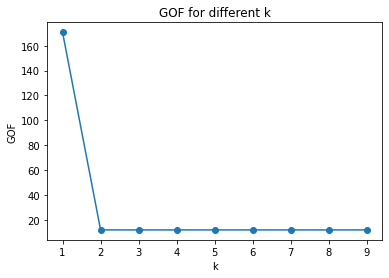

In [13]:
k_a = list(range(1,10))

plt.plot(k_a, gof_a, 'o-')
plt.xlabel('k')
plt.ylabel('GOF')
plt.title('GOF for different k')
plt.show()

I would pick k=2 as the the most appropriate value.

### (2) Regardless of what you found in (1) above, for this next part take the number of dimensions to be k=2. Plot the products at their coordinates as output by MDS. Next to each point on the plot, place a text label giving the name of the corresponding product like the in plots we saw in the lecture slides.  In R this is done by the text() command after creating the display of the plot, and in Python matplotlib.pyplot by using the annotate() command before  creating the display of the plot by show()

### (i) Your equally scaled plot with points labeled with the product names 

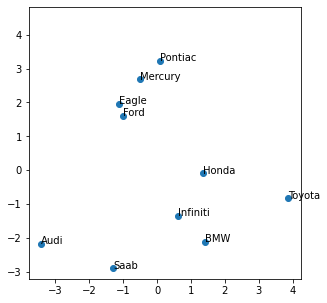

In [14]:
np.random.seed(410)

mds_a2 = manifold.MDS(n_components=2, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out_a2 = mds_a2.fit(cars_od)

plt.figure(figsize=(5, 5))
plt.scatter(mds_fit_out_a2.embedding_[:, 0], mds_fit_out_a2.embedding_[:, 1])
    
for i, name in enumerate(cars_od.index):
    plt.annotate(name, (mds_fit_out_a2.embedding_[i, 0], mds_fit_out_a2.embedding_[i, 1]))
    
plt.axis('square')
plt.show()

### (ii) The clockwise-angle you rotated the plot to get a meaningful interpretation. You only have to state the angle that you mentally rotated the plot, you do NOT have to submit a rotated plot (rotating a plot in R or Python is more complex than you may realize). 

Clockwise angle: 15 degrees


### (iii) Your description of what the horizontal and vertical axes mean under this rotation.  Report the clockwise-angle, so if in your mind you rotate the plot 70 degrees anticlockwise, then you should report the clockwise-angle as 290 degrees.

Horizontal Axis: Sporty

Vertical Axis: Poorly Built

# Part (B) Nonmetric multidimensional scaling

### (1) Plot the stress measure for every value of k from 1 to 5. What would you pick as the the most appropriate value? The guiding principle to pick the best k is to identify the value of k beyond which there is very limited improvement of GOF or BOF. Turnin: the plot, and your chosen value of "k" .

In [14]:
np.random.seed(410)

gof_b = []

for k in range(1,6):
    mds_i = manifold.MDS(n_components=k, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out_i = mds_i.fit(cars_od)
    gof_i = mds_fit_out_i.stress_
    gof_b.append(gof_i)

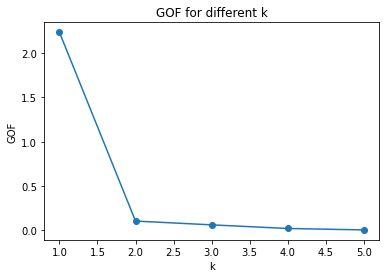

In [15]:
k_b = list(range(1,6))

plt.plot(k_b, gof_b, 'o-')
plt.xlabel('k')
plt.ylabel('GOF')
plt.title('GOF for different k')
plt.show()

I would pick k=2 as the the most appropriate value.

### (2) Regardless of what you found in (1) above, for this next part take the number of dimensions to be k=2. Produce an equally scaled plot of the points with labels corresponding to the product names.

### (i) Your equally scaled plot with points labeled with the product names 

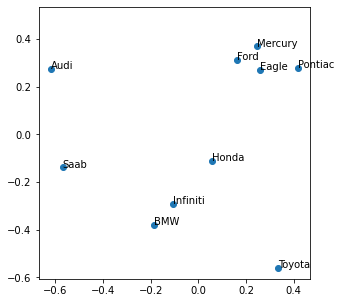

In [16]:
np.random.seed(410)

mds_b2 = manifold.MDS(n_components=2, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out_b2 = mds_b2.fit(cars_od)

plt.figure(figsize=(5, 5))
plt.scatter(mds_fit_out_b2.embedding_[:, 0], mds_fit_out_b2.embedding_[:, 1])

for i, name in enumerate(cars_od.index):
    plt.annotate(name, (mds_fit_out_b2.embedding_[i, 0], mds_fit_out_b2.embedding_[i, 1]))

plt.axis('square')
plt.title('Perceptual Map with Points and Attribute Vectors')

plt.show()

### (ii) The clockwise-angle you rotated the plot to get a meaningful interpretation. You only have to state the angle that you mentally rotated the plot, you do NOT have to submit a rotated plot (rotating a plot in R or Python is more complex than you may realize). 

Clockwise angle rotation: 330 degrees


### (iii) Your description of what the horizontal and vertical axes mean under this rotation.  Report the clockwise-angle, so if in your mind you rotate the plot 70 degrees anticlockwise, then you should report the clockwise-angle as 290 degrees.

Horizontal Axis: Sporty

Vertical Axis: Common

# Part (C) Factor Analysis

### (1) Plot the GOF measure for every value of nfactors from 1 to 10. What would you pick as the most appropriate value of "nfactors"? Turnin: the plot, and your chosen value of "nfactors".

In [17]:
fa_gof_c1 = []

for i in range(1,11):
    fa = FactorAnalyzer(n_factors=i, rotation=None)
    fa_fit_out = fa.fit(cars_ar)
    fa_communalities = fa_fit_out.get_communalities()
    fa_gof = sum(fa_communalities)
    fa_gof_c1.append(fa_gof)

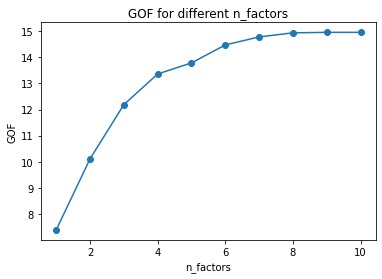

In [18]:
n_factors_a = list(range(1,11))

plt.plot(n_factors_a, fa_gof_c1, 'o-')
plt.xlabel('n_factors')
plt.ylabel('GOF')
plt.title('GOF for different n_factors')
plt.show()

I would pick 5 as the most appropriate value of "nfactors".

### (2) Regardless of what you found in (1) above, take the number of dimensions to be nfactors=2. Produce an equally scaled plot of the points with labels corresponding to the product names.

### (i) Your perceptual map with the points and the attribute vectors together. Make sure your plot is equally scaled. 

In [19]:
np.random.seed(410)

fa = FactorAnalyzer(n_factors=2, rotation=None)
fa_fit_out = fa.fit(cars_ar)
fa_communalities = fa_fit_out.get_communalities()
fa_gof = sum(fa_communalities)
fa_scores = fa_fit_out.transform(cars_ar)
fa_factor_loadings = fa_fit_out.loadings_

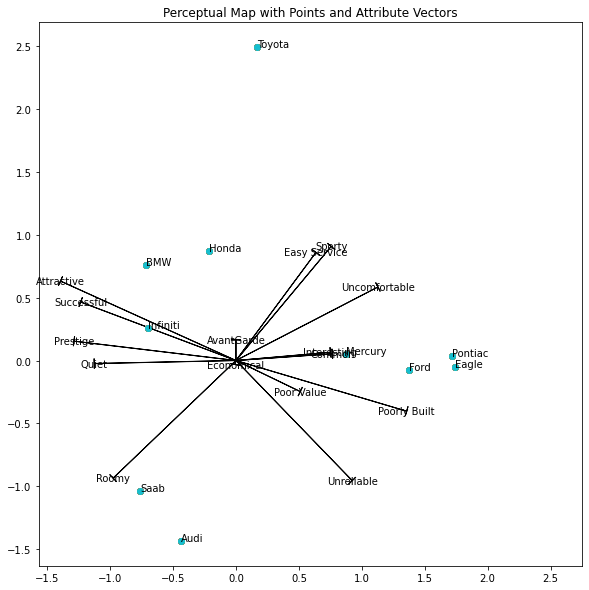

In [20]:
plt.figure(figsize=(10, 10))

for i in range(fa_factor_loadings.shape[0]):
    betax = fa_factor_loadings[i][0]
    betay = fa_factor_loadings[i][1]
    R2_value = fa_communalities[i]
    
    
    arrow_origin_x = 0
    arrow_origin_y = 0
    
    arrowlengthscaleup = 1.5
    
    arrow_end_x = arrowlengthscaleup * R2_value * betax / ((betax**2 + betay**2)**0.5)
    arrow_end_y = arrowlengthscaleup * R2_value * betay / ((betax**2 + betay**2)**0.5)
    
    plt.arrow(arrow_origin_x, arrow_origin_y, arrow_end_x-arrow_origin_x, arrow_end_y-arrow_origin_y, length_includes_head=True, head_width=0.08, head_length=0.0002)
    plt.text(arrow_end_x, arrow_end_y, cars_ar.columns[i], ha='center', va='center')

for i in range(fa_scores.shape[0]):
    plt.scatter(fa_scores[:, 0], fa_scores[:, 1])
    plt.annotate(list(cars_od.columns)[i], (fa_scores[i, 0], fa_scores[i, 1]))
    
plt.axis('square')
plt.title('Perceptual Map with Points and Attribute Vectors')

plt.show()

### (ii) The clockwise-angle you rotated the plot to get a meaningful interpretation. 

330 degrees

### (iii)Your description of what the horizontal and vertical axes mean.  Additionally, give a moderately detailed qualitative analysis of the different car makes and how they are different from one another.

Horizontal Axis: Attractive - Poorly Built


Vertical Axis: Roomy - Uncomfortable


Qualitative analysis: 

- Infiniti: High in attractiveness and quietness. Mediocre in terms of reliability and build quality. Moderately interesting and prestigious. Roomy and easy for servicing.
- Ford: Average in attractiveness and quietness. Mediocre in terms of reliability and build quality. Interesting. Roomy and easy for servicing. Associated with poor value.
- Audi: Moderate in attractiveness and quietness. Mediocre in terms of reliability and build quality. Moderately interesting. Roomy but uncomfortable. Easy for servicing. Associated with poor value.
- Toyota: High in attractiveness and sportiness. Low in reliability and build quality. Moderately interesting. Roomy and easy for servicing. Associated with poor value.
- Eagle: Average in attractiveness and reliability. Poor in terms of build quality. Moderately interesting. Roomy and easy for servicing. Associated with prestige and success.
- Honda: High in attractiveness and quietness. Moderate in terms of reliability and build quality. Moderately interesting. Roomy and easy for servicing. Economical.
- Saab: High in attractiveness and roominess. Moderate in terms of reliability and build quality. Moderately interesting. Uncomfortable. Roomy and easy for servicing. Associated with poor value.
- Pontiac: Low in attractiveness and quietness. Mediocre in terms of reliability and build quality. High in interest. Roomy but uncomfortable. Easy for servicing. Associated with commonness.
- BMW: High in attractiveness. Moderate in quietness, reliability, and build quality. Moderately interesting and successful. Roomy and easy for servicing. Associated with prestige.
- Mercury: Low in attractiveness and quietness. Mediocre in terms of reliability and build quality. Moderately interesting. Uncomfortable. Roomy and easy for servicing. Associated with poor value.

# Part (D) Competition Analysis using text mining of Amazon reviews [Optional for Extra Credit]


In [71]:
bag = pd.read_csv("bag-of-words-representation.csv", sep=",", index_col=0)

def collapse_similar_words(df, similar_word_groups):
    for group in similar_word_groups:
        new_column_name = '_'.join(group)
        df[new_column_name] = df[group].sum(axis=1)
        df.drop(columns=group, inplace=True)

similar_word_pairs = [['day', 'days'], 
                      ['didnt', 'doesnt', 'dont'], 
                      ['buy', 'bought'], 
                      ['something', 'anything', 'thing', 'stuff'], 
                      ['week', 'weeks'],
                      ['use', 'used', 'using'],
                      ['year', 'years'],
                      ['think', 'thought'],
                      ['product', 'products'],
                      ['oil', 'oily'],
                      ['many', 'much', 'lot', 'couple'],
                      ['look', 'looking', 'looks'],
                      ['little', 'small', 'less'],
                      ['one', 'two', 'twice'],
                      ['time', 'times'],
                      ['work', 'works', 'worked'],
                      ['month', 'months'],
                      ['price', 'worth', 'money'],
                      ['made', 'make', 'makes'],
                      ['get', 'getting', 'got' , 'give', 'help', 'improvement', 'take'],
                      ['lotion', 'moisturizer'],
                      ['going', 'gone'],
                      ['good', 'great', 'happy', 'fine', 'amazing', 'better', 'best', 'nice', 'well'],
                      ['find', 'found'],
                      ['definitely', 'really', 'actually'],
                      ['feel', 'feeling', 'feels', 'felt'],
                      ['long', 'far'],
                      ['face', 'facial', 'breakouts', 'skin', 'scars', 'sensitive', 'wrinkles']]

collapse_similar_words(bag, similar_word_pairs)

bag

,acid,acne,ago,almost,also,always,amazon,another,apply,around,away,back,bad,bit,break.,can,cant,clean,clear,cream,decided,difference,dry,enough,even,ever,every,expensive,eyes,first,highly,however,ive,just,keep,know,last,left,like,lines,love,may,minutes,morning,need,never,new,next.,night,nothing,noticed,now,olay,old,peel,people,pimples,pores,pretty,problem,put,recommend,red,results,reviews,right,say,see,seems,since,smell,smooth,soft,spots,started,still,sure,though,treatment,tried,try,want,wash,way,will,without,day_days,didnt_doesnt_dont,buy_bought,something_anything_thing_stuff,week_weeks,use_used_using,year_years,think_thought,product_products,oil_oily,many_much_lot_couple,look_looking_looks,little_small_less,one_two_twice,time_times,work_works_worked,month_months,price_worth_money,made_make_makes,get_getting_got_give_help_improvement_take,lotion_moisturizer,going_gone,good_great_happy_fine_amazing_better_best_nice_well,find_found,definitely_really_actually,feel_feeling_feels_felt,long_far,face_facial_breakouts_skin_scars_sensitive_wrinkles
1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,3,0,1,0,0,0,0,1,0,1,1,1,2,2,1,0,0,0,0,1,4,0,0,1,4,1,1,1,0,0,0,0,2,0,4,4,0,0,2,0,1,1,0,0,1,0,9
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,2,0,1,1,0,1,0,1,0,0,1,2,2,1,2,0,0,0,0,3
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,2,2,0,0,0,2,1,0,4,1,2,0,0,0,0,1,0,0,1,2,0,0,1,0,2,0,0,4
4,0,28,0,3,0,1,2,2,1,1,0,0,0,1,3,4,1,0,4,1,1,0,2,1,3,2,0,0,0,2,1,3,5,7,0,0,0,0,0,0,0,1,0,2,0,0,0,0,5,0,1,8,0,1,0,2,4,0,1,0,1,2,2,4,3,0,6,4,4,2,0,0,2,1,2,4,1,1,4,1,1,0,0,0,7,1,6,1,0,2,8,14,2,1,17,0,7,4,4,1,6,6,2,0,3,7,3,1,8,4,1,2,7,24
5,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,0,0,1,0,6,0,1,0,0,0,0,2,3,1,0,0,0,0,3,0,0,4,0,2,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
5302,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,3,0,1,0,0,3
5303,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,3,1,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,3


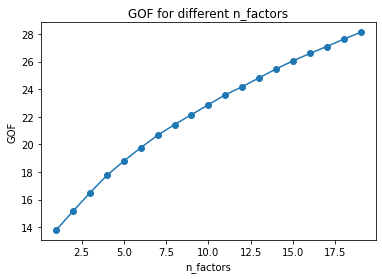

In [72]:
fa_gof_d = []

for i in range(1,20):
    fa = FactorAnalyzer(n_factors=i, rotation=None)
    fa_fit_out = fa.fit(bag)
    fa_communalities = fa_fit_out.get_communalities()
    fa_gof = sum(fa_communalities)
    fa_gof_d.append(fa_gof)
    
n_factors_d = list(range(1,20))

plt.plot(n_factors_d, fa_gof_d, 'o-')
plt.xlabel('n_factors')
plt.ylabel('GOF')
plt.title('GOF for different n_factors')
plt.show()

Pick n_factors=7

IndexError: list index out of range

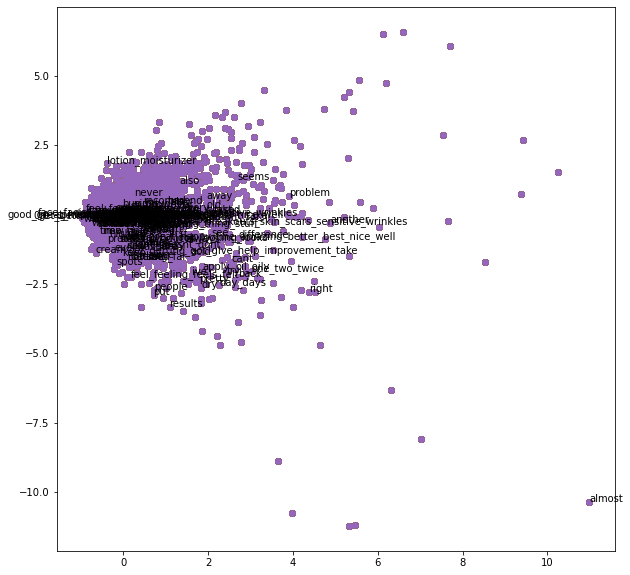

In [73]:
np.random.seed(410)

fa = FactorAnalyzer(n_factors=7, rotation=None)
fa_fit_out = fa.fit(bag)
fa_communalities = fa_fit_out.get_communalities()
fa_gof = sum(fa_communalities)
fa_scores = fa_fit_out.transform(bag)
fa_factor_loadings = fa_fit_out.loadings_

plt.figure(figsize=(10, 10))

for i in range(fa_factor_loadings.shape[0]):
    betax = fa_factor_loadings[i][0]
    betay = fa_factor_loadings[i][1]
    R2_value = fa_communalities[i]
    
    
    arrow_origin_x = 0
    arrow_origin_y = 0
    
    arrowlengthscaleup = 1.5
    
    arrow_end_x = arrowlengthscaleup * R2_value * betax / ((betax**2 + betay**2)**0.5)
    arrow_end_y = arrowlengthscaleup * R2_value * betay / ((betax**2 + betay**2)**0.5)
    
    plt.arrow(arrow_origin_x, arrow_origin_y, arrow_end_x-arrow_origin_x, arrow_end_y-arrow_origin_y, length_includes_head=True, head_width=0.08, head_length=0.0002)
    plt.text(arrow_end_x, arrow_end_y, bag.columns[i], ha='center', va='center')

for i in range(fa_scores.shape[0]):
    plt.scatter(fa_scores[:, 0], fa_scores[:, 1])
    plt.annotate(list(bag.columns)[i], (fa_scores[i, 0], fa_scores[i, 1]))
    
plt.axis('square')
plt.title('Perceptual Map with Points and Attribute Vectors')

plt.show()

In [74]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from pprint import pprint

# Example corpus of text documents
documents = list(bag.columns)

# Tokenize and preprocess the documents
tokenized_docs = [simple_preprocess(doc) for doc in documents]

# Create dictionary mapping of words to IDs
dictionary = corpora.Dictionary(tokenized_docs)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)

# Print topics and associated words
pprint(lda_model.print_topics())

[(0,
  '0.021*"even" + 0.021*"minutes" + 0.021*"put" + 0.021*"buy_bought" + '
  '0.021*"seems" + 0.021*"pimples" + 0.021*"however" + 0.021*"since" + '
  '0.021*"expensive" + 0.021*"peel"'),
 (1,
  '0.020*"night" + 0.020*"long_far" + 0.020*"see" + 0.020*"never" + '
  '0.020*"use_used_using" + 0.020*"will" + 0.020*"clean" + 0.020*"old" + '
  '0.020*"keep" + 0.020*"need"'),
 (2,
  '0.019*"try" + 0.019*"almost" + 0.019*"soft" + 0.019*"back" + '
  '0.019*"without" + 0.019*"sure" + 0.019*"nothing" + 0.019*"ever" + '
  '0.019*"month_months" + 0.019*"olay"')]


# Part (E)  The Adidas Size Scale problem   [Optional for Extra Credit]
1. What is the appropriate multivariate analysis method for this problem? Regression? Classification? Cluster Analysis? Multidimensional scaling? Factor Analysis? Principal Components Analysis? How exactly would you apply one of these methods to the data files given above?

First, I would structure the data into a matrix where each row corresponds to a different participant (e.g., subject ID), and each column represents a specific anthropometric measurement (e.g., chest height, forearm breadth, neck circumference). Then, I'd apply Multidimensional Scaling to condense the data's dimensionality, allowing us to visualize relationships between participants based on their chosen dimensions.

To determine the appropriate number of dimensions (k), I would identify the elbow point on the goodness-of-fit curve. Typically, this might yield a number indicating the dimensions to retain, balancing complexity and explanatory power.

Using this reduced-dimensional representation, I would construct a Perceptual Map, plotting points for each participant and attribute vectors for each anthropometric dimension. By experimenting with rotation angles, I could find the optimal orientation for comparison. This might involve identifying horizontal and vertical axes that facilitate meaningful participant comparisons.


2. Describe how you will go about answering the following questions (Note that I am not looking for the answers themselves. Rather I want to know HOW you will go about getting the answers): How many sizes should there be? Very likely, three (Small, Medium, Large) will not be enough. What is the right number? The size labels can also be just numbers (example 1, 2, 3) instead of letter labels. Hint, one has to build the appropriate model, create a goodness of fit measure and determine the elbow of the curve or some other way to assess a number of sizes beyond which additional sizes do not lead to more comfortable or customized fit to the consumer. 

To determine how many sizes there should be, I would cluster participants based on the dimensions derived from the previous mapping exercise. Determining the right number of clusters, or the appropriate "k," can be done by identifying the elbow point on the goodness-of-fit curve. This might typically yield at least five clusters, representing sizes like XL, L, M, S, and XS.

3. Describe how you will go about answering the following question: What should the specified dimensions be?  These should be a subset of the anthropometric variables given in the datafiles.

To determine how the specified dimensions should be, I would start by selecting the scalable dimensions, which might be indicated by empirical data, and creating a Perceptual Map that includes all anthropometric variables. Then, I'd examine the extreme values to select a few key anthropometric variables to serve as axes after various rotations. With so many potential parameters, condensing the data might still leave us with a complex and time-consuming mapping process.

4. Describe how you will go about answering the following question:  For each size for each chosen dimension, what should the exact value be? For example, for a shirt, if you chose the specified dimensions in Step 3 above to be sleeve length, waist size, neck size, shoulder width, chest size, back width, then: For size=Extra Extra Small XXS, what values should these be? For size=Small S, what values should these be? For size=Large L, what values should these be? And so on, for every single size that you chose in Step 2 above. The speaker from Adidas emphasized that the size to dimension mapping need NOT be interval scaled or ratio scaled. It is okay for them to be ordinal scaled. This means there is no requirement that the increase in chest size when moving from size=2 to size=3 be the same as the increase in chest size when moving from size=3 to size=4. Being ordinal scaled means that all we require is that chest size of size=2 be less than chest size of size=3 which would be less than chest size of size=4.

To determine what the exact value should be for each size for each chosen dimension, I wouldd check out the map from different angles for each dimension and group the data points accordingly. The number of groups we end up with will give us the exact value for each size in each dimension we're focusing on.

5. What instructions should Adidas give a consumer to help him/her figure out what his/her size is? The intended use case is that once a consumer figures out that his/her size is 3 for example, then every size=3 shirt should fit him/her pretty well, and ideally every other item (eg pants, shoes) of size=3 should also fit him/her pretty well also.

Instructions that Adidas should give a consumer to help him/her figure out what his/her size is may include: Adidas needs to offer straightforward, step-by-step guidelines for accurately measuring various body parts like the bust, waist, and sleeve length. These instructions should clarify how to interpret these measurements to determine your clothing size. Moreover, it's important for Adidas to emphasize that once you've identified your size, any clothing item you purchase in that size should provide a good fit, regardless of its type.

# Part (F)  Using generative AI tools [Optional for Extra Credit]

## (a)
1. plot MDS in python
2. make plot equally scaled
3. collapse two columns in python
4. User lda in python

## (b)
ChatGpt

## (c)

In [ ]:
# 1.

# Example data
X = np.array([[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]])

# Create an MDS object
mds = MDS(n_components=2)

# Fit the data and transform it to the low-dimensional space
X_transformed = mds.fit_transform(X)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('Multidimensional Scaling Plot')
plt.show()

In [ ]:
# 2.
plt.axis('square')

In [ ]:
# 3.
import pandas as pd

# Example DataFrame with words as columns
data = {
    'word1': [1, 0, 2, 1],
    'word2': [0, 1, 1, 0],
    'word3': [2, 1, 0, 1]
}

df = pd.DataFrame(data)

# Manually collapsing words into a new column
def collapse_words(df, columns_to_collapse, new_column_name):
    df[new_column_name] = df[columns_to_collapse].sum(axis=1)
    df.drop(columns=columns_to_collapse, inplace=True)

# Specify which columns to collapse and the name of the new column
columns_to_collapse = ['word1', 'word2']
new_column_name = 'collapsed_column'

# Collapse the specified columns into a new column
collapse_words(df, columns_to_collapse, new_column_name)

# Display the resulting DataFrame
print(df)

In [ ]:
# 4.
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from pprint import pprint

# Example corpus of text documents
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey"
]

# Tokenize and preprocess the documents
tokenized_docs = [simple_preprocess(doc) for doc in documents]

# Create dictionary mapping of words to IDs
dictionary = corpora.Dictionary(tokenized_docs)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)

# Print topics and associated words
pprint(lda_model.print_topics())